## Author activity
This script was written to observe the activity of individual authors and to generate a graph illustrating said activity.

In [8]:
train_direct = './training_data/train.pkl'

In [9]:
import pandas as pd

Importing training data

In [10]:
data = pd.read_pickle(train_direct)
data['time'] = data['time'].map(lambda x: (x.split('T')[0],x.split('T')[1]))
data['date'] , data['hour']=zip(*data['time'])
#data.head()

In [11]:
#Removing the "+00:00"
data['hour'] = data['hour'].map(lambda x: (x.replace('+00:00','')))
data['time'] = data['time'].map(lambda x: (x[0],x[1].replace('+00:00','')))

Getting info on a single author

In [12]:
#author5155_activity = data.loc[data['authorID'] == '5155'].sort_values(by = 'date')
author5111_activity = data.loc[data['authorID'] == '5111'].sort_values(by = 'date')

In [13]:
author5111_activity['time'] = author5111_activity['time'].map(lambda x: ' '.join(x))

Transforming content of Time column into timestamps

In [14]:
author5111_activity['time'] = pd.to_datetime(author5111_activity['time'])

Getting info on a single day

In [15]:
#Get info about just one day
author5111_activity_2015_04_24 = author5111_activity.loc[author5111_activity['date'] == '2015-06-07']

Sorting data chronologically

In [16]:
s_author5111_activity_2015_04_24 = author5111_activity_2015_04_24.sort_values(by='hour')

Importing modules to generate graphs

In [17]:
import pandas as pd
from numpy.random import randint
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import pylab
import matplotlib.ticker as ticker

Converting string labels to numerical values for graph

In [18]:
#Converting categorical labels to numbers in order to plot them with matplot
author5111_activity['num_labels'] = author5111_activity['label'].map({'green': 0, 'amber': 1, 'red': 2, 'crisis': 3})

In [19]:
#Converting categorical labels to numbers in order to plot them with matplot
author5111_activity_2015_04_24['num_labels'] = author5111_activity_2015_04_24['label'].map({'green': 0, 'amber': 1, 'red': 2, 'crisis': 3})

/usr/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
s_author5111_activity_2015_04_24['num_labels'] = s_author5111_activity_2015_04_24['label'].map({'green': 0, 'amber': 1, 'red': 2, 'crisis': 3})

In [21]:
#Dropping na because it doesn't look good in the graph
author5111_activity = author5111_activity.dropna(subset=['label'])

In [22]:
#Dropping na because it doesn't work in the graph (we get an error, also NaN does not show as blank)
s_author5111_activity_2015_04_24 = s_author5111_activity_2015_04_24.dropna(subset=['label'])

Generating graph for overall activity

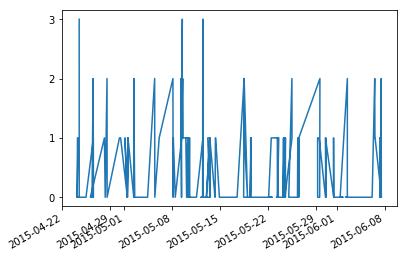

In [23]:
import matplotlib.dates as md
import numpy as np
import datetime
x = author5111_activity['time']
y = author5111_activity['num_labels']


plt.plot(x, y)
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.gcf().autofmt_xdate()
plt.show()

# Plot

Generating graph for a single day

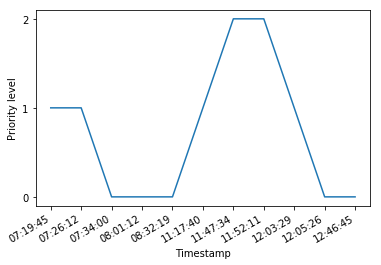

In [24]:
x = s_author5111_activity_2015_04_24['hour']
y = s_author5111_activity_2015_04_24['num_labels']


plt.plot(x, y)
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.gcf().autofmt_xdate()
plt.ylabel('Priority level')
plt.xlabel('Timestamp')
plt.show()